**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

---

Mentoría #13 - Cómo hacer un Clasificador de Pliegos todoterreno (y de otros tipos de textos) usando NLP

---
Integrantes Grupo [1|2]:
*   Bruce Wayne: bruce.w@wayne-entreprises.com
*   Alfred Pennyworth: alfred@msn.com
*   Richard Grayson: robin_132@gmail.com
---

Edición 2023


# Introducción

En esta Mentoría, trabajaremos con un conjunto de datos que comprende aproximadamente 100.000 pliegos y licitaciones de diversos organismos nacionales, tanto públicos como privados. Estos datos se obtuvieron de un sistema/servicio diseñado para monitorear oportunidades de negocios, capturar la información en una base de datos, normalizarla y, posteriormente, clasificarla para informar a los usuarios según sus áreas de interés. Los usuarios de este sistema reciben alertas automáticas cada vez que se publica una oportunidad comercial que coincide con su perfil.

## Desafío

Como parte del proceso de clasificación, los pliegos se etiquetan utilizando principalmente reglas estáticas, como palabras clave, lo cual deja margen para optimizaciones. El título de cada pliego y principalmente la descripción de los objetos que se están licitando son campos de tipo texto y escritos por personas, por lo que naturalmente presentan ambigüedades y características propias del lenguaje que llevan a que un enfoque rígido y estático de clasificación, como el actual, resulte limitado y poco eficiente.

El Desafío es utilizar las técnicas de Aprendizaje Automático, logrando así un "Clasificador" que utilice técnicas de Procesamiento de Lenguaje Natural (NLP) para clasificar de manera más eficiente en qué rubro o categoría se encuentra un pliego, basándose en su texto descriptivo y otros campos relacionados.

## Interés General

Más allá de la aplicación específica en este conjunto de datos, este problema, al estar vinculado al Procesamiento de Lenguaje Natural (PLN) y la clasificación, tiene la ventaja de poder ser utilizado posteriormente para otros tipos de contenido. De esta manera, el clasificador desarrollado podría aplicarse para categorizar libros, noticias, textos, tweets, publicaciones, artículos, etc.

## Descripción del dataset

A continuación se enumeran las diferentes variables del dataset, así como una breve descripción de su significado:

- **id**: Clave única y primaria autoincremental de la tabla;
- **cargado**: Fecha de carga del pliego;
- **idexterno**: Id del pliego en la fuente;
- **referencia**: Campo auxiliar obtenido de la fuente;
- **objeto**: Campo principal, descripción del producto o servicio objeto de la licitación;
- **rubro**: Campo de categorización disponible en la fuente. No siempre está disponible;
- **agencia**: Empresa o Ente que lanza la licitación;
- **apertura**: Fecha de apertura del pliego (vencimiento para presentarse al pliego);
- **subrubro**: Subcategoría del pliego (también obtenido desde la fuente);
- **pais**: País donde se lanza la licitación;
- **observaciones**: Campo auxiliar donde se guardan datos extra que puede variar según la fuente;
- **monto**: Monto del pliego, no siempre está publicado;
- **divisaSimboloISO**: Moneda en la que se especifica el pliego;
- **visible**: campo binario que determina si el pliego va a ser visualizado por el sistema (True/False);
- **categoría**: Tipo de pliego, categorización entre diversos tipos de pliegos (Compra Directa, Licitación Simple, Subasta, etc.);
- **fuente**: Fuente de donde se obtuvo la licitación.

# Trabajo Práctico #1

Como primer trabajo práctico se requiere hacer un análisis exploratorio del dataset, analizando distribuciones, dispersión de las variables, naturaleza de los datos alojados en cada variable, etc. Es una primera aproximación a los datos, por lo que, como todo trabajo de exploración, requiere principalmente de técnicas de visualización, agrupación y lectura de las distintas variables.

A continuación se enumeran los ejercicios propuestos como guía:

## Ejercicio 1: Descripción

Hacer una descripción propia del dataset a modo de resumen, resaltando las variables que se consideran más importantes.

Describir las principales variables según las características de los datos, por ejemplo, explorar la distribución de los valores, la característica de los mismos, explorar el conjunto para evidenciar si existen valores faltantes.

De preferencia, utilizar visualizaciones en esta etapa de exploración

## Ejercicio 2: Exploración

Analizar ahora con mayor detalle las variables importantes dentro del conjunto:

*   Hay variables numéricas?
*   Son del tipo contínuo o discreta
*   Hay variables categóricas?
*   Hay variables "derivadas" de otras variables
*   En las variables de tipo texto, es homogénea la longitud de los datos?
*   Hay registros con mayor longitud que otros?
*   Representará esto un problema a tratar más adelante?
*   Existen desbalances en la distribución o son los datos homogéneos?
*   Existen datos faltantes?

Nuevamente, utilizar las preguntas descriptas como guía para la exploración y hacer gráficas y visualizaciones como forma práctica de evidenciar lo observado.

## Ejercicio 3: Análisis

A partir de los datos y de la exploración realizada, qué podemos anticipar en relación a las variables *rubro* y *subrubro*?

Están siempre presentes? Representan algún tipo de desbalanceo?

Existen pliegos con más de una categorización en la fuente de origen? Qué distribución hay en ese caso?

Nota: Aquí ya nos topamos con una de las problemáticas del dataset. Es esta categorización en origen "confiable"? Qué posturas podemos tomar frente a estas etiquetas originales?

Describir en forma de texto la postura del Grupo respecto a estas variables y a posibles estrategias para abordarlas en adelante. Este será un factor muy importante cuando comencemos a preparar el dataset para alimentar los modelos de clasificación.

# Desarrollo

In [ ]:
# Link al dataset: https://drive.google.com/file/d/1jo9cZNHAPpsTosW-2JA4CLo4SaFCHfIs/view?usp=drive_link

In [37]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./Mentoria_Dataset_0.csv" , encoding='latin-1')

df.head()

print(df['fuente'].unique())
print(df['agencia'].unique())

#print(len(df))





['Telecom' 'Argentinacompra' 'CABA' 'Telefonica' 'Comprar' 'Cordoba'
 'EPEC' 'EPE' 'SantaFe' 'Mendoza' 'GBA' 'AySA']
['Telecom Argentina S.A.' 'COM. NACIONAL  DE ENERGIA ATOMICA'
 'ESTADO MAYOR GENERAL DEL EJERCITO' ...
 'GBA 484-MINISTERIO DE COMUNICACIÓN PÚBLICA - SUBSECRETARÍA DE COORDINACIÓN DE MEDIOS'
 'Comprar Mendoza - Dcción. de Jóvenes y Adultos'
 'GBA 287-DIRECCION GENERAL DE CULTURA Y EDUCACION -DIRECCION GENERAL DE CULTURA Y EDUCACION']


detalles del dataset: 16 columnas, 104999 filas.

# columnas relevantes: 

* objeto
* rubro
* agencia
* fuente
* apertura
* monto
* categoria
* idexterno


# datos redundantes: 

* idexterno (referencia + subrubro)
* pais: son todos los priegos de arg
* fecha de carga: irrelevante, comparada con fecha del pliego
* divisaSimboloISO: incompleta, y se asume pesos
* subrubro: incompleta
* observaciones: muy incompleta
* indice: es el mismo index de pandas



# Datos faltantes

Nos fijamos usando missingno los datos faltantes. Vemos que no todas las entradas tienen un valor en 'monto'.


Consigna: explorar la distribución de los valores, la característica de los mismos, explorar el conjunto para evidenciar si existen valores faltantes.

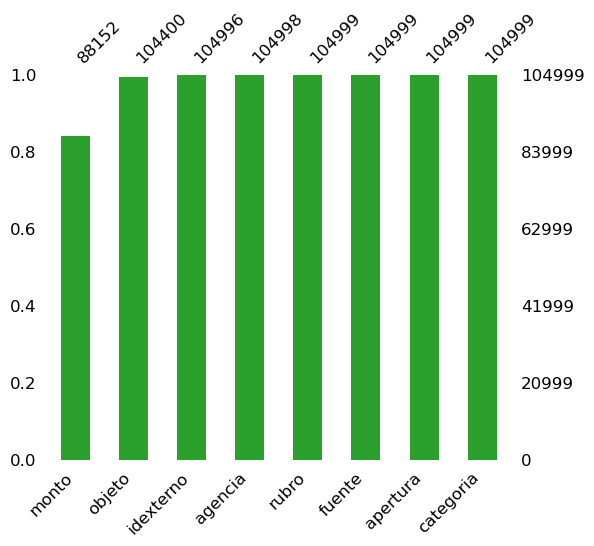

In [25]:
rel_col = ["objeto",'rubro','agencia',"fuente",'apertura','monto','categoria','idexterno']

fig, axs = plt.subplots(figsize=(6, 5))
msno.bar(df[rel_col], sort="ascending", fontsize=12, color="tab:green", ax=axs)
#axs.set_ylim(0.8, 1)
plt.show()

Ahora nos fijamos en la descripción de las principales variables elegidas:



In [31]:
print(df['rubro'].unique())
print('rubro: ',len(df['rubro'].unique()))
print('objeto: ',len(df['objeto'].unique()))
print('agencia: ',len(df['agencia'].unique()))
print('fuente: ',len(df['fuente'].unique()))
print('apertura: ',len(df['apertura'].unique()))
print('monto: ',len(df['monto'].unique()))
print('categoria: ',len(df['categoria'].unique()))
print('idexterno: ',len(df['idexterno'].unique()))


['ELECTRICIDAD Y TELEFONIA' 'AGRIC,GANADERIA,CAZA,SILVICULT' 'ALIMENTOS'
 ...
 'ELEMENTOS DE LIMPIEZA, LIBRERIA,PAP. Y UTILES OFICINA, COMBUSTIBLES Y LUBRICANTES, FERRETERIA, ELECTRICIDAD Y TELEFONIA, MATERIALES DE CONSTRUCCION, EQUIPOS, HERRAMIENTAS, PROD. MEDICO/FARMACEUTICOS/LAB'
 'ELEMENTOS DE LIMPIEZA, FERRETERIA, PRODUCTOS VETERINARIOS, PROD. MEDICO/FARMACEUTICOS/LAB, QUIMICOS'
 'INDUMENT TEXTIL Y CONFECCIONES, LIBRERIA,PAP. Y UTILES OFICINA, COMBUSTIBLES Y LUBRICANTES, FERRETERIA, CERRAJERIA, REPUESTOS, MATERIALES DE CONSTRUCCION, QUIMICOS']
rubro:  5185
objeto:  91897
agencia:  1402
fuente:  12
apertura:  22694
monto:  17615
categoria:  2
idexterno:  104858


Ahora nos fijamos en la cantidad de entradas que tienen las fuente, categoria y visible:

## duda: qué es cada categoría?

## proposición: 
* filtrar las variables 'categoría' y 'visible', dado que son variables binarias muy sesgadas (quedarnos en ambos casos con 1).
* Trabajar la variable 'monto', que está bastante fea
* Hacer una columna nueva con la longitud de la string de la variable 'objeto', y hacer un histograma
* filtrar apertura por mes o año, para disminuir la cantidad de entradas distintas
* ver que las fechas de cargado estén llenas de la misma forma
* ver que las entradas de 'agencia' estén bien escritas y que no haya repetidas pero mal escritas
* damos por hecho que todo es de argentina

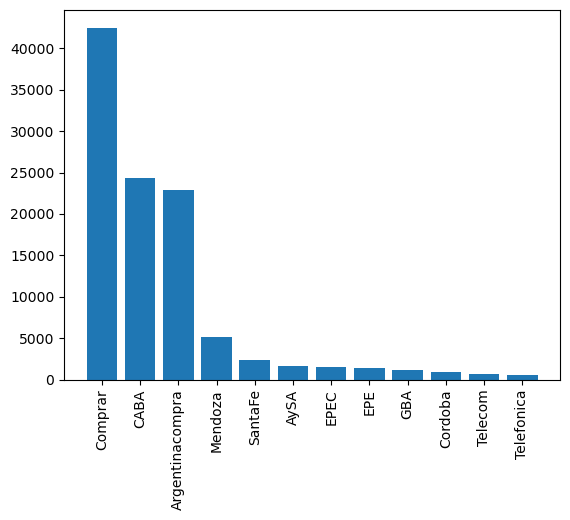

[2 1]


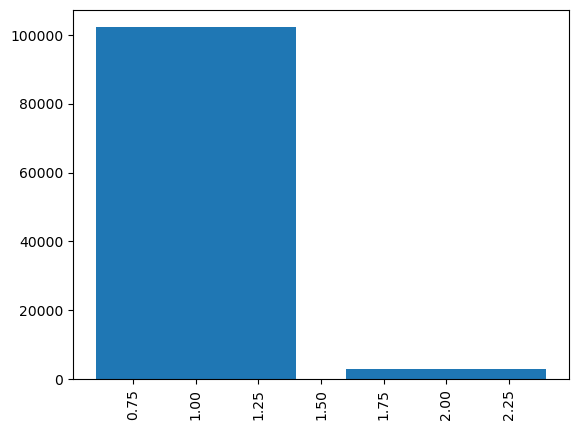

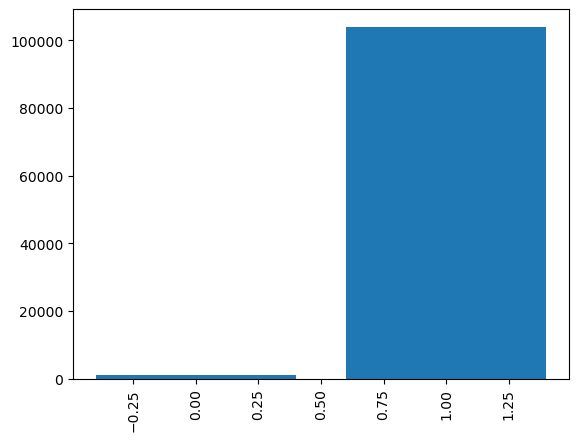

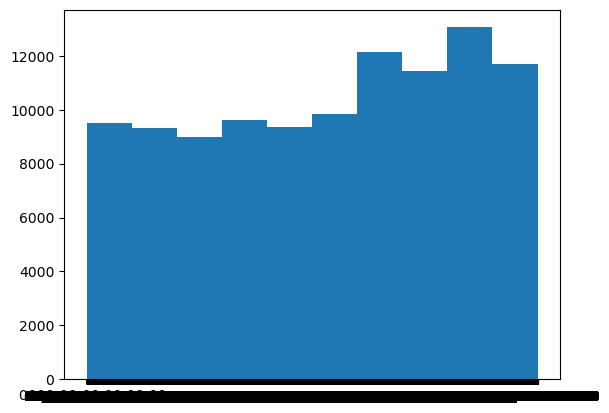

In [40]:
frecuencia_fuente = df['fuente'].value_counts()
plt.bar(frecuencia_fuente.index, frecuencia_fuente.values)
plt.xticks(rotation=90)
plt.show()

print(df['categoria'].unique())

frecuencia_categoria = df['categoria'].value_counts()
plt.bar(frecuencia_categoria.index, frecuencia_categoria.values)
plt.xticks(rotation=90)
plt.show()

frecuencia_vis = df['visible'].value_counts()
plt.bar(frecuencia_vis.index, frecuencia_vis.values)
plt.xticks(rotation=90)
plt.show()

#apertura: 
# print(np.array(df['monto']))
plt.hist(np.array(df['apertura']), edgecolor='black')
plt.xticks(rotation=90)
plt.show()